Minimizing f(x) = x^2:


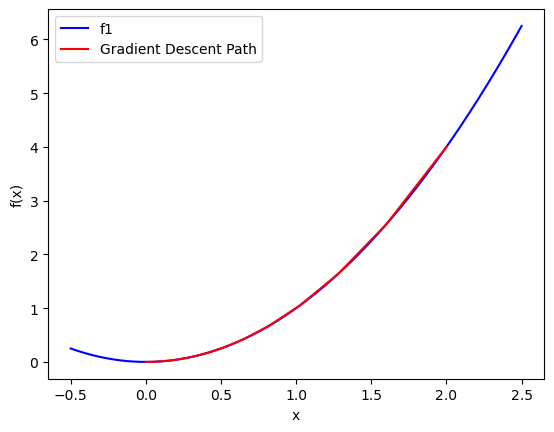

Minima found at x = 0.0, f(x) = 0.0

Minimizing f(x) = x^4 - 2x^2:
Starting at x0 = 0:


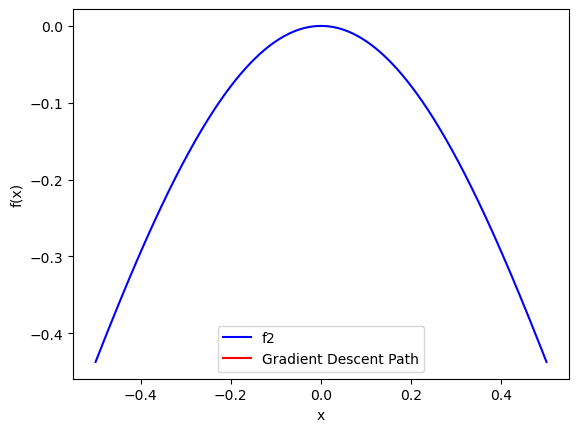

Minima found at x = 0, f(x) = 0

Starting at x0 = 1:


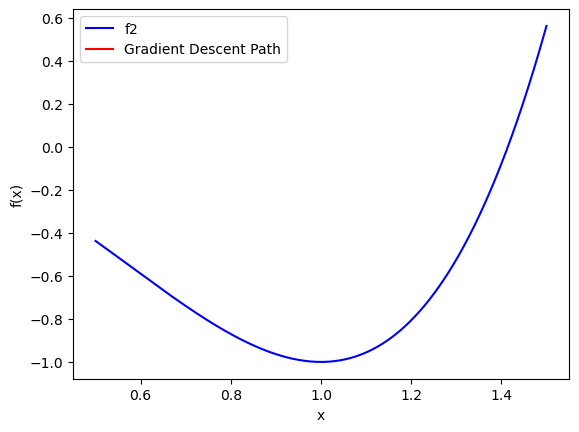

Minima found at x = 1, f(x) = -1

Starting at x0 = -1:


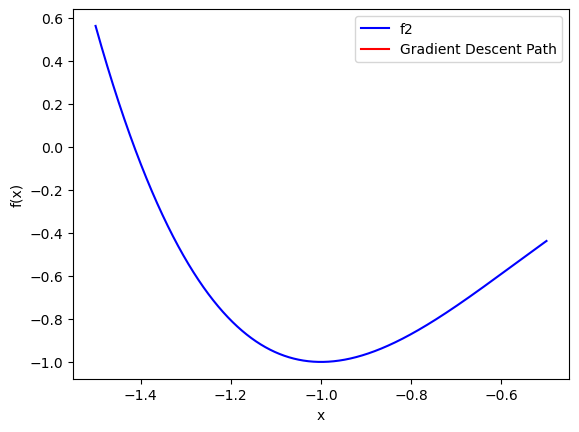

Minima found at x = -1, f(x) = -1


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Derivative approximation using symmetric difference quotient
def deriv(f, base_point):
    return (f(base_point + 10**(-10)) - f(base_point - 10**(-10))) / (2 * 10**(-10))

# Gradient descent function
def gradient_descent(f, learning_rate, initial_point, max_iters=1000, tolerance=1e-6):
    x_coords = [initial_point]  # List to store x values
    y_coords = [f(initial_point)]  # List to store f(x) values
    
    current_point = initial_point #starting the gradient descrent
    for _ in range(max_iters): #iterating through the maximum # of iterations
        grad = deriv(f, current_point) #storing grad variable as the derivative approximiation at the current point
        new_point = current_point - learning_rate * grad #update the point
        
        # If the change in point is smaller than tolerance, stop
        if abs(new_point - current_point) < tolerance:
            break
        
        # Update the current point and record the new values
        current_point = new_point
        x_coords.append(current_point)
        y_coords.append(f(current_point))
    
    # Plotting portion
    plot_range = np.linspace(min(x_coords)-0.5, max(x_coords)+0.5, 10000)
    function_range = [f(i) for i in plot_range]
    
    plt.plot(plot_range, function_range, label=f'{f.__name__}', color='blue')
    plt.plot(x_coords, y_coords, label='Gradient Descent Path', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

    # Return the last x and f(x) values rounded to three decimal places
    return round(x_coords[-1], 3), round(y_coords[-1], 3)

# Define the functions
def f1(x):
    return x**2

def f2(x):
    return x**4 - 2*x**2

# Run gradient descent for f1(x) = x^2
print("Minimizing f(x) = x^2:")
x_min, y_min = gradient_descent(f1, learning_rate=0.1, initial_point=2)
print(f"Minima found at x = {x_min}, f(x) = {y_min}")

# Run gradient descent for f2(x) = x^4 - 2x^2
print("\nMinimizing f(x) = x^4 - 2x^2:")

# Test with x0 = 0
print("Starting at x0 = 0:")
x_min, y_min = gradient_descent(f2, learning_rate=0.1, initial_point=0)
print(f"Minima found at x = {x_min}, f(x) = {y_min}")

# Test with x0 = 1
print("\nStarting at x0 = 1:")
x_min, y_min = gradient_descent(f2, learning_rate=0.1, initial_point=1)
print(f"Minima found at x = {x_min}, f(x) = {y_min}")

# Test with x0 = -1
print("\nStarting at x0 = -1:")
x_min, y_min = gradient_descent(f2, learning_rate=0.1, initial_point=-1)
print(f"Minima found at x = {x_min}, f(x) = {y_min}")

#For funny(x), the gradient descent does not work because the function is growing rapidly. As a reuslt, the gradient descent will take steps too large, which can causes incorrect (overshoot) minima to be printed. 
#Furthermore, although funny(x) is continuous, the function has very steep slopes at x=0. As a result, the gradient vector will not converge correctly at this point. 
